In [34]:
import pandas as pd

filepath = './data/consumption_temp.csv'
df = pd.read_csv(filepath)

display(df.head())

,time,location,consumption,temperature
0,2022-04-07 21:00:00,bergen,1.113325,-0.3
1,2022-04-07 21:00:00,oslo,4.092830,1.0
2,2022-04-07 21:00:00,stavanger,2.057858,1.3
3,2022-04-07 21:00:00,tromsø,1.246582,-3.9
4,2022-04-07 21:00:00,trondheim,1.970098,-2.8


In [35]:
# Convert 'time' to Pandas Timestamp
df['timestamp'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S')
df = df.drop(columns=['time'])

# Add column `item_id` that corresponds to the `location`
df['item_id'] = df['location'].str.replace(' ', '_').str.lower()

# Write the dataframe to a new CSV file
df.to_csv('./data/aneo.csv', index=False)
display(df.head())

,location,consumption,temperature,timestamp,item_id
0,bergen,1.113325,-0.3,2022-04-07 21:00:00,bergen
1,oslo,4.092830,1.0,2022-04-07 21:00:00,oslo
2,stavanger,2.057858,1.3,2022-04-07 21:00:00,stavanger
3,tromsø,1.246582,-3.9,2022-04-07 21:00:00,tromsø
4,trondheim,1.970098,-2.8,2022-04-07 21:00:00,trondheim


In [36]:
# Number of rows with each location
df['location'].value_counts()

# TODO: How do we handle missing data in `helsingfors`?

location
bergen         8641
oslo           8641
stavanger      8641
tromsø         8641
trondheim      8641
helsingfors    6289
Name: count, dtype: int64

## Data exploration and visualization

### Visualize seasonality in the consumption

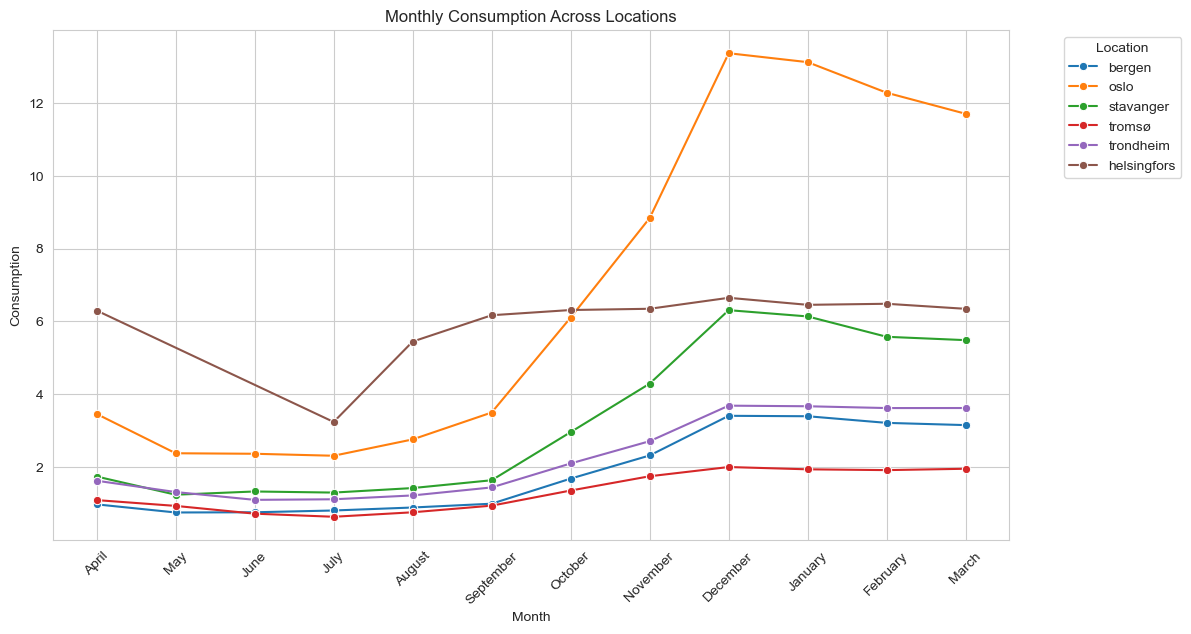

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Extracting month from the 'timestamp' column and creating a new column 'month'
# Note: For a precise analysis, you would need a dataset that spans multiple years
df['month'] = df['timestamp'].dt.month_name()

# Sorting values by 'timestamp' to ensure the line plot is ordered correctly
df = df.sort_values('timestamp')

# Set aesthetic style of the plots
sns.set_style("whitegrid")

# Initialize a figure
plt.figure(figsize=(12, 6))

# Line plot for consumption
sns.lineplot(data=df, x='month', y='consumption', hue='location', marker="o", errorbar=None)

# Title and labels
plt.title('Monthly Consumption Across Locations')
plt.xlabel('Month')
plt.ylabel('Consumption')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


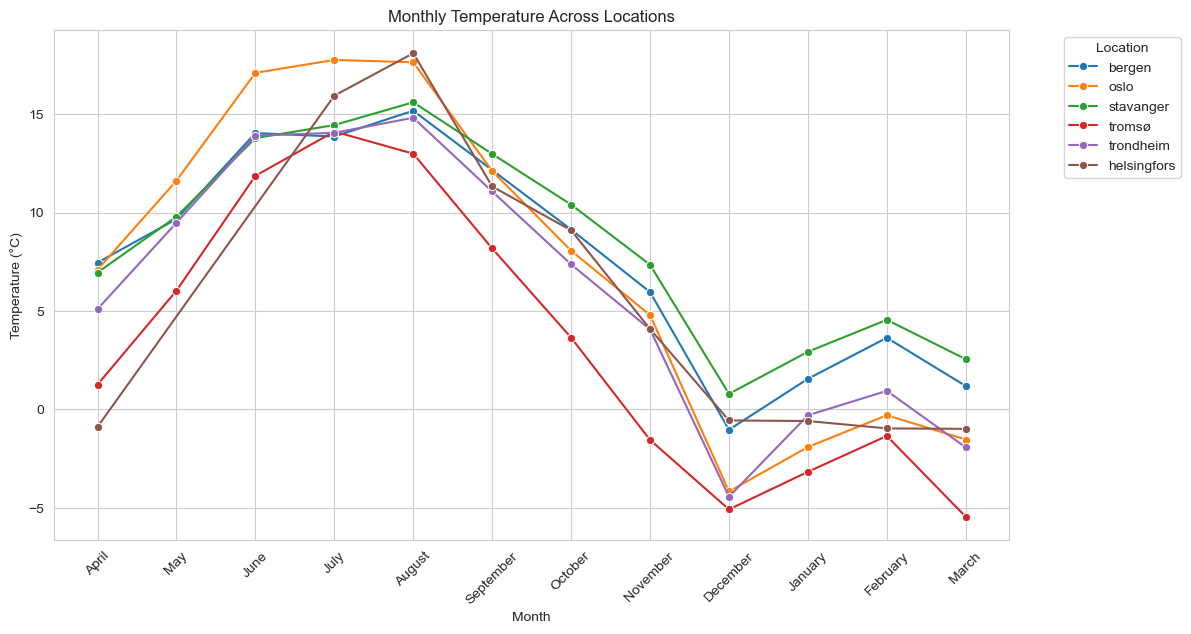

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set aesthetic style of the plots
sns.set_style("whitegrid")

# Initialize a figure
plt.figure(figsize=(12, 6))

# Line plot for temperature
sns.lineplot(data=df, x='month', y='temperature', hue='location', marker="o", errorbar=None)

# Title and labels
plt.title('Monthly Temperature Across Locations')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


### Scatter plots to visualize the relationship between consumption and temperature

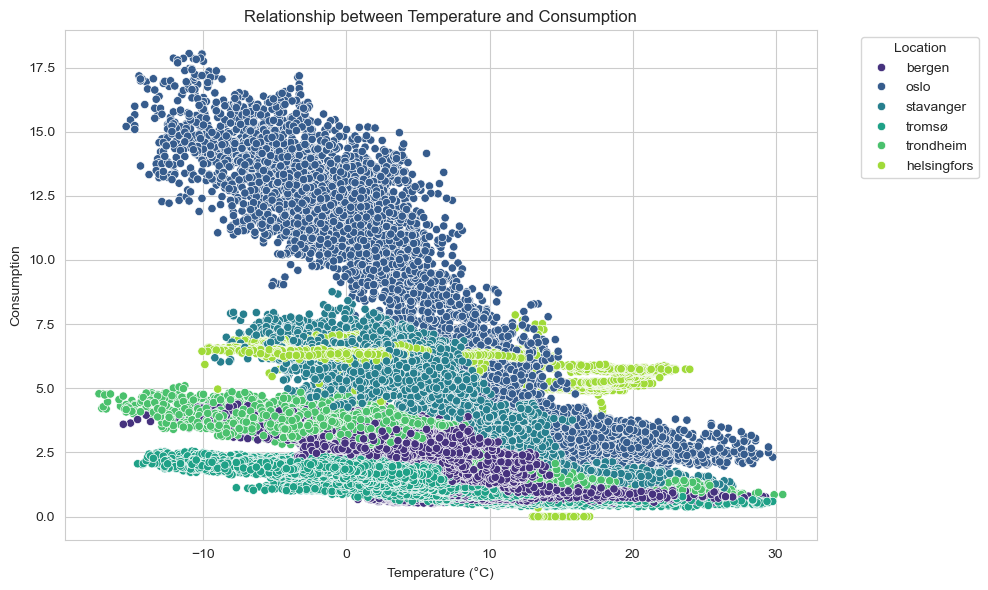

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set aesthetic style of the plots
sns.set_style("whitegrid")

# Initialize a figure
plt.figure(figsize=(10, 6))

# Create a scatter plot
sns.scatterplot(data=df, x='temperature', y='consumption', hue='location', palette='viridis')

# Title and labels
plt.title('Relationship between Temperature and Consumption')
plt.xlabel('Temperature (°C)')
plt.ylabel('Consumption')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()


In the visualization above, it seems there are some outliers for Helsingfors where consumption is 0. Perhaps this correlates the the time period where Helsingfors in missing data.

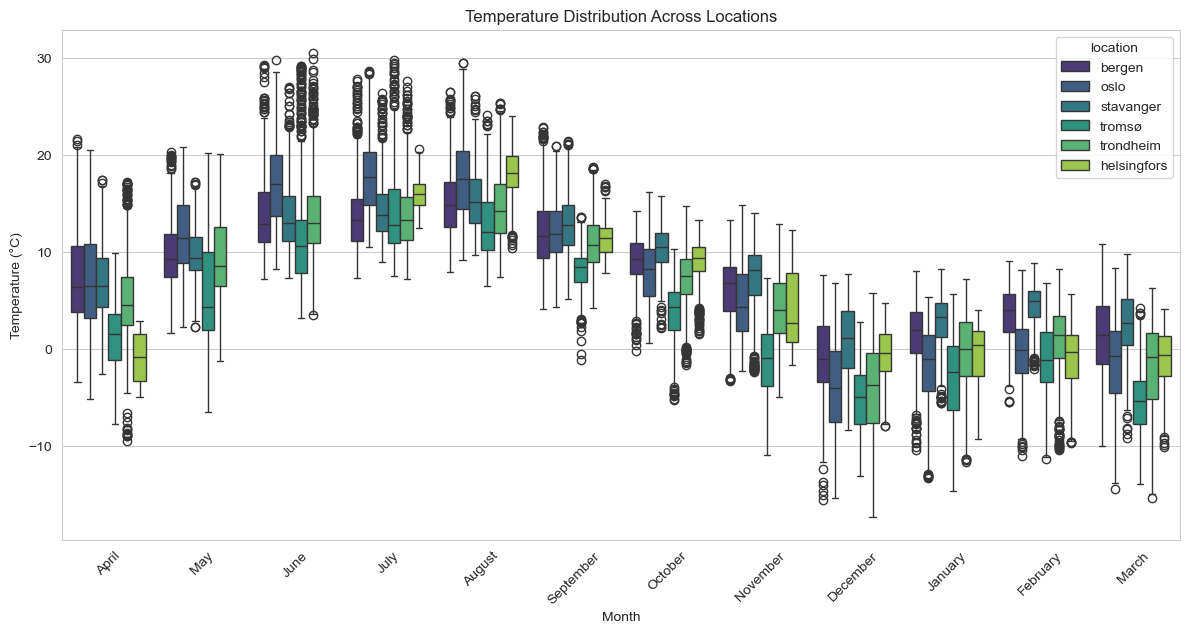

In [40]:
# Visualize temperature each month for each location
import seaborn as sns
import matplotlib.pyplot as plt

# Set aesthetic style of the plots
sns.set_style("whitegrid")

# Initialize a figure
plt.figure(figsize=(12, 6))

# Create a box plot
sns.boxplot(data=df, x='month', y='temperature', hue='location', palette='viridis')

# Title and labels
plt.title('Temperature Distribution Across Locations')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')

# Show plot
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()



### Correlation Analysis: Check if there's a correlation between energy consumption and temperature.

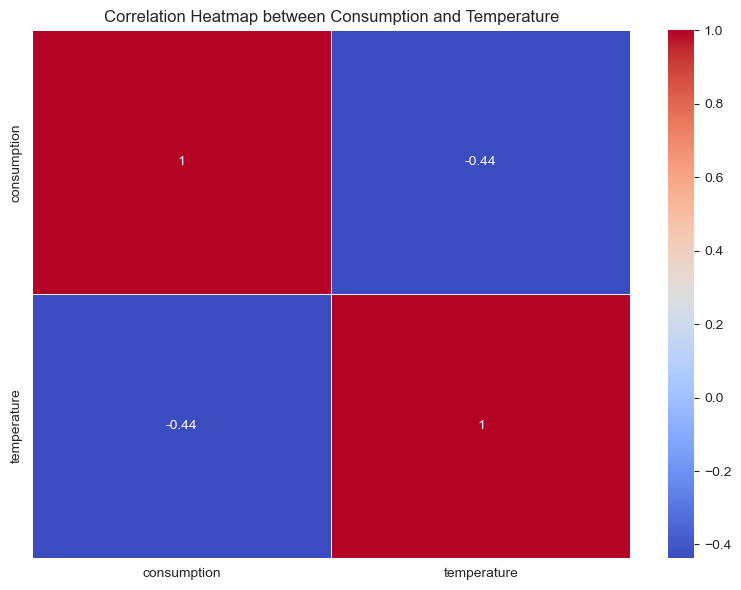

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df[['consumption', 'temperature']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Generate a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)

# Title
plt.title('Correlation Heatmap between Consumption and Temperature')

# Show plot
plt.tight_layout()
plt.show()


- **1 (Upper Left)**: This is the correlation of consumption with itself, always 1.
- **1 (Lower Right)**: This is the correlation of temperature with itself, always 1.
- **0.05 (Upper Right and Lower Left)**: This is the correlation between consumption and temperature. Since it is close to 0, it suggests that there is no strong linear relationship between the two. A change in temperature is not associated with a significant or consistent change in energy consumption and vice-versa.

### Boxplots to visualize the distribution of consumption and temperature across different locations.

/var/folders/6f/f4jmdnpx54s3hmfy9g0jlvch0000gn/T/ipykernel_33903/1980300686.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='location', y='consumption', ax=ax[0], palette="viridis")
/var/folders/6f/f4jmdnpx54s3hmfy9g0jlvch0000gn/T/ipykernel_33903/1980300686.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='location', y='temperature', ax=ax[1], palette="viridis")


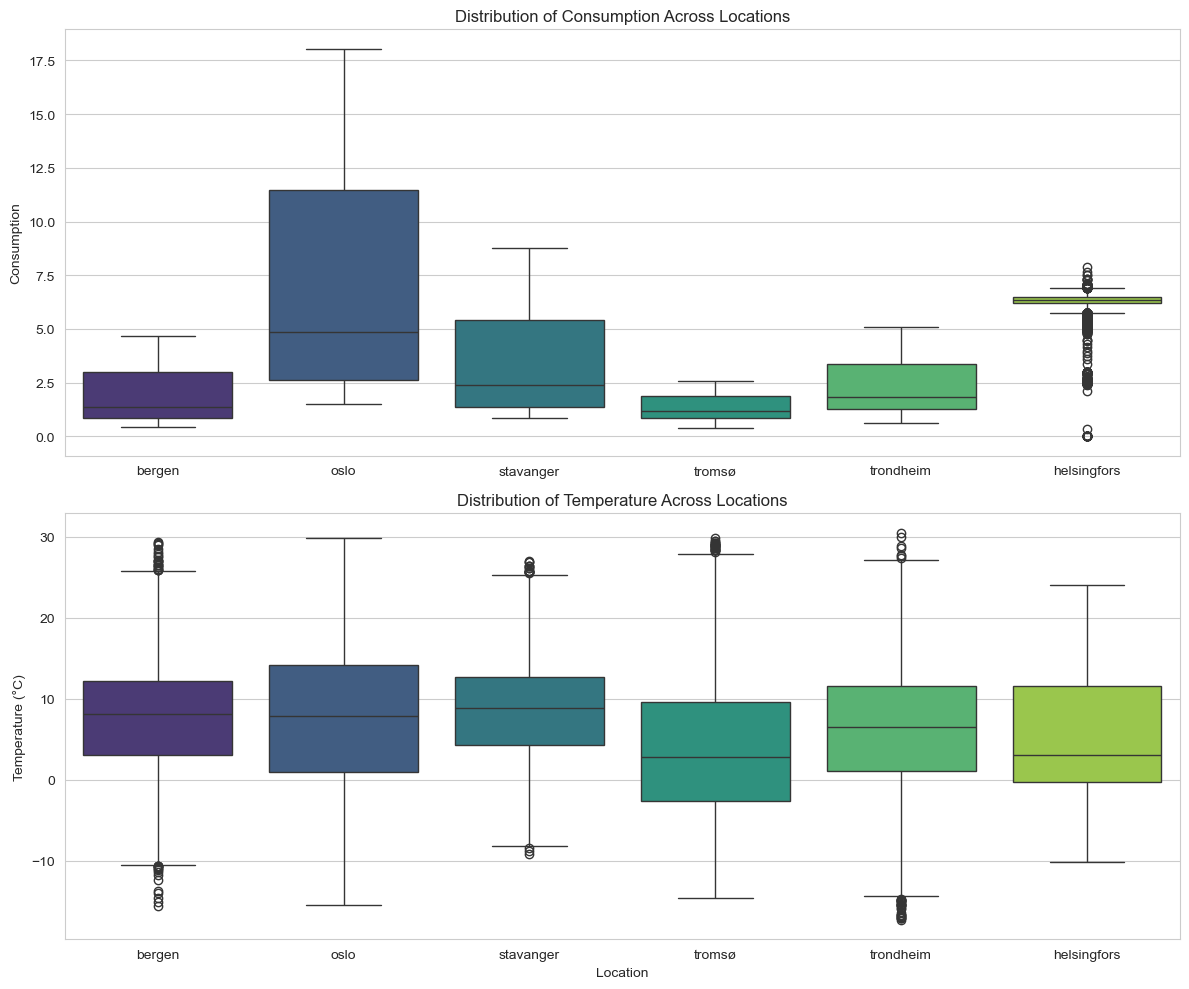

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set aesthetic style of the plots
sns.set_style("whitegrid")

# Initialize a figure with two subplots
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Create a boxplot for the distribution of consumption across different locations
sns.boxplot(data=df, x='location', y='consumption', ax=ax[0], palette="viridis")
ax[0].set_title('Distribution of Consumption Across Locations')
ax[0].set_ylabel('Consumption')
ax[0].set_xlabel('')

# Create a boxplot for the distribution of temperature across different locations
sns.boxplot(data=df, x='location', y='temperature', ax=ax[1], palette="viridis")
ax[1].set_title('Distribution of Temperature Across Locations')
ax[1].set_ylabel('Temperature (°C)')
ax[1].set_xlabel('Location')

# Adjust and show plot
plt.tight_layout()
plt.show()


### Histograms: To understand the distribution of numerical data like consumption and temperature

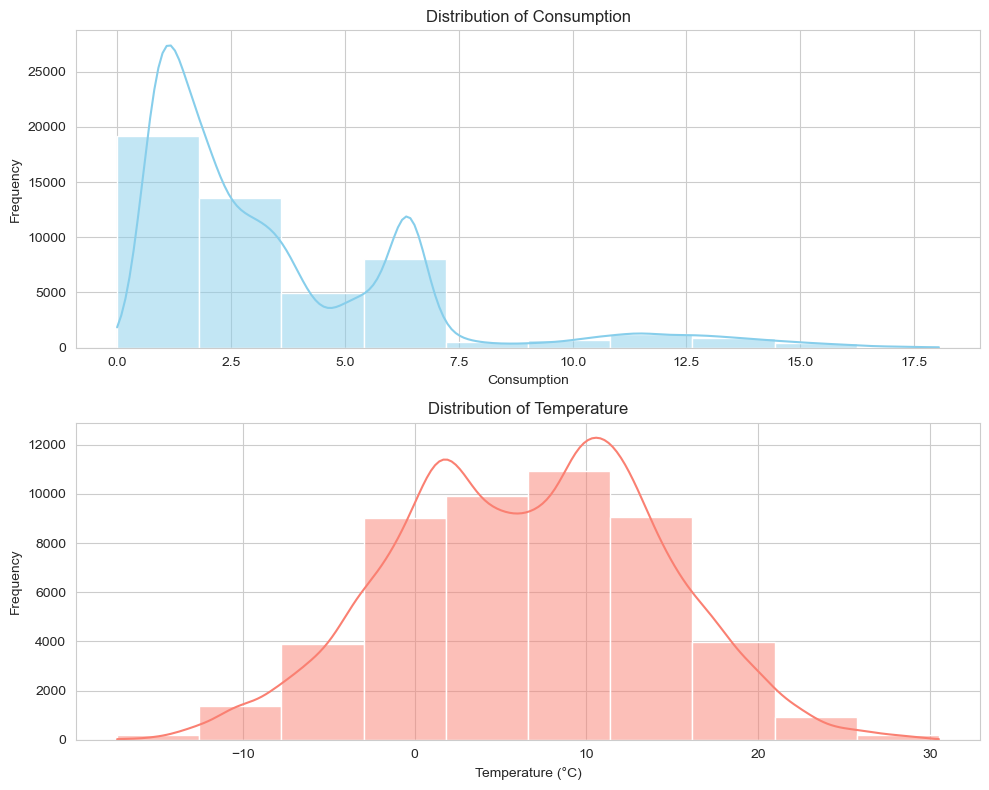

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set aesthetic style of the plots
sns.set_style("whitegrid")

# Initialize a figure with two subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Histogram for consumption
sns.histplot(data=df, x='consumption', bins=10, kde=True, ax=ax[0], color='skyblue')
ax[0].set_title('Distribution of Consumption')
ax[0].set_xlabel('Consumption')
ax[0].set_ylabel('Frequency')

# Histogram for temperature
sns.histplot(data=df, x='temperature', bins=10, kde=True, ax=ax[1], color='salmon')
ax[1].set_title('Distribution of Temperature')
ax[1].set_xlabel('Temperature (°C)')
ax[1].set_ylabel('Frequency')

# Adjust and show plot
plt.tight_layout()
plt.show()


Basic Statistics for Consumption


count    49494.000000
mean         3.509242
std          3.096356
min          0.000000
25%          1.263256
50%          2.376530
75%          5.189000
max         18.045011
Name: consumption, dtype: float64


Basic Statistics for Temperature


count    49494.000000
mean         6.554019
std          7.630308
min        -17.299999
25%          1.000000
50%          6.800000
75%         12.100000
max         30.500000
Name: temperature, dtype: float64


Grouped Statistics for Consumption by Location


,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
bergen,8641.0,1.876716,1.156034,0.443192,0.834003,1.380962,2.998324,4.650816
helsingfors,6289.0,6.077242,0.919462,0.000000,6.189000,6.354000,6.474000,7.860000
oslo,8641.0,6.876428,4.672634,1.520560,2.610569,4.871180,11.458471,18.045011
stavanger,8641.0,3.304703,2.112962,0.832372,1.382764,2.390667,5.398822,8.763147
tromsø,8641.0,1.340776,0.559151,0.372637,0.831883,1.195308,1.874898,2.552159
trondheim,8641.0,2.278574,1.137311,0.620001,1.263027,1.841736,3.376217,5.099158



Grouped Statistics for Temperature by Location


,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
bergen,8641.0,7.750237,6.556976,-15.600000,3.1,8.1,12.2,29.299999
helsingfors,6289.0,5.662903,7.592141,-10.100000,-0.3,3.1,11.6,24.000000
oslo,8641.0,7.392883,8.770901,-15.400000,0.9,7.9,14.2,29.799999
stavanger,8641.0,8.547795,5.839943,-9.200000,4.3,8.9,12.7,27.000000
tromsø,8641.0,3.514119,7.967161,-14.600000,-2.6,2.8,9.6,29.799999
trondheim,8641.0,6.213621,7.616749,-17.299999,1.1,6.5,11.6,30.500000


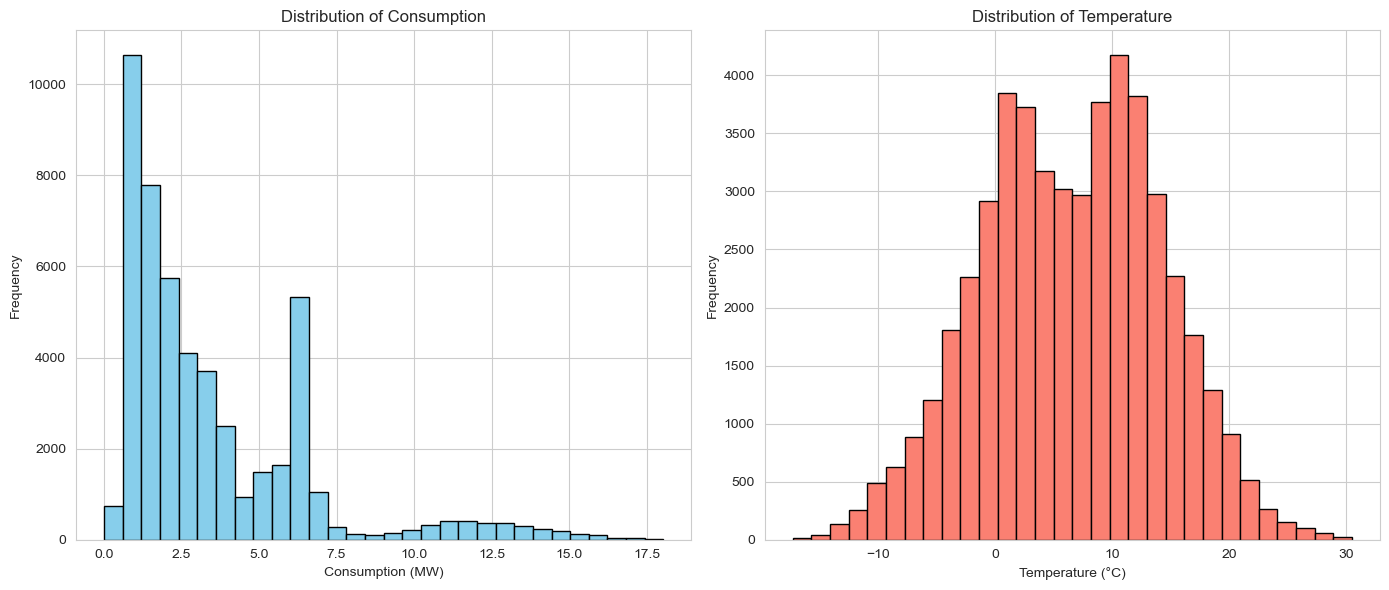

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Basic statistical properties
stats_consumption = df['consumption'].describe()
stats_temperature = df['temperature'].describe()

print("Basic Statistics for Consumption")
display(stats_consumption)

print("\nBasic Statistics for Temperature")
display(stats_temperature)

# Grouped statistical properties by location
grouped_stats_consumption = df.groupby('location')['consumption'].describe()
grouped_stats_temperature = df.groupby('location')['temperature'].describe()

print("\nGrouped Statistics for Consumption by Location")
display(grouped_stats_consumption)

print("\nGrouped Statistics for Temperature by Location")
display(grouped_stats_temperature)

# Visualizing the distribution of 'consumption' and 'temperature'
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].hist(df['consumption'], bins=30, color='skyblue', edgecolor='black')
ax[0].set_title('Distribution of Consumption')
ax[0].set_xlabel('Consumption (MW)')
ax[0].set_ylabel('Frequency')

ax[1].hist(df['temperature'], bins=30, color='salmon', edgecolor='black')
ax[1].set_title('Distribution of Temperature')
ax[1].set_xlabel('Temperature (°C)')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


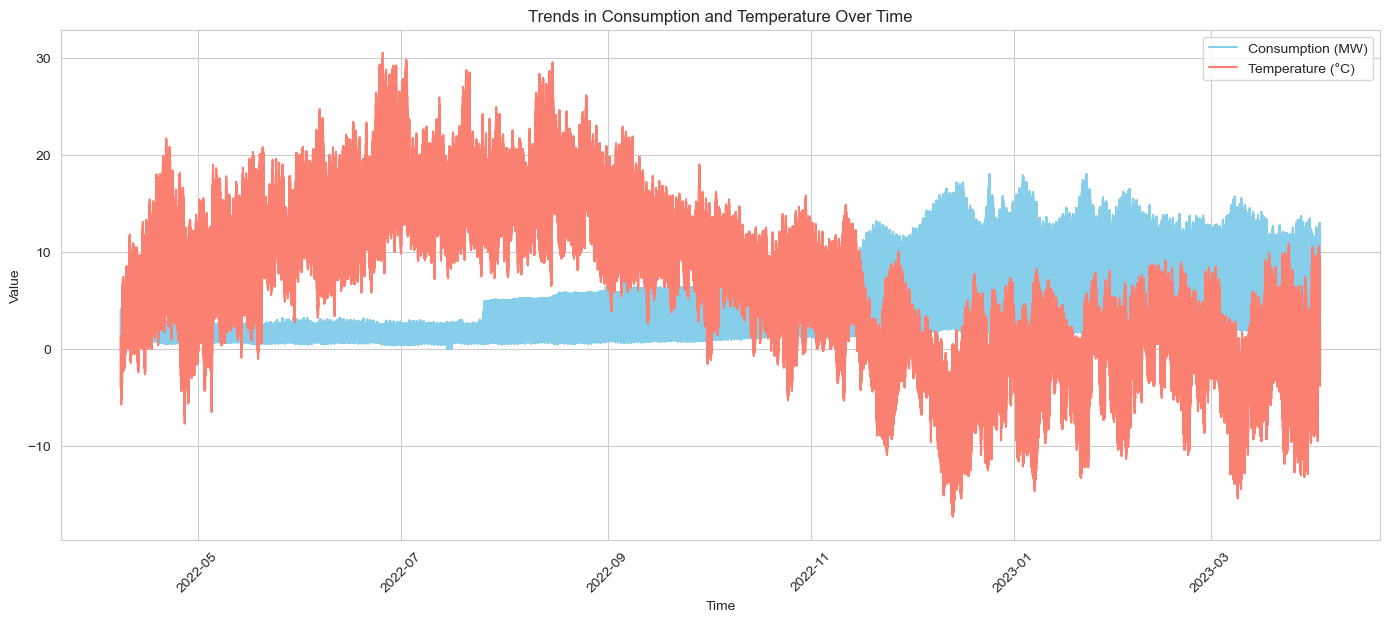

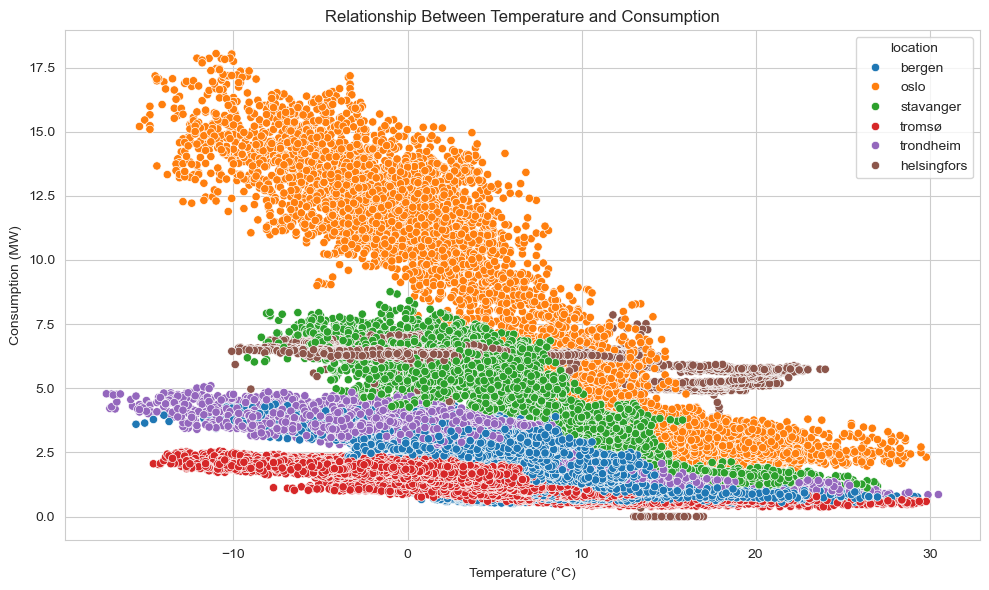

Correlation between Temperature and Consumption: -0.44


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set aesthetic style of the plots
sns.set_style("whitegrid")

# Visualizing trends in consumption and temperature overtimestamp 
plt.figure(figsize=(14, 6))
plt.plot(df['timestamp'], df['consumption'], label='Consumption (MW)', color='skyblue')
plt.plot(df['timestamp'], df['temperature'], label='Temperature (°C)', color='salmon')
plt.title('Trends in Consumption and Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

# Visualizing relationship between temperature and consumption
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['temperature'], y=df['consumption'], hue=df['location'])
plt.title('Relationship Between Temperature and Consumption')
plt.xlabel('Temperature (°C)')
plt.ylabel('Consumption (MW)')
plt.tight_layout()
plt.show()

# Calculating and displaying the correlation between temperature and consumption
correlation = df['temperature'].corr(df['consumption'])
print(f'Correlation between Temperature and Consumption: {correlation:.2f}')


## Prediction

In [46]:
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

features_to_keep = ['consumption', 'timestamp', 'item_id']

# Only keep the features we are interested in
prediction_df = df[features_to_keep]

train_data = TimeSeriesDataFrame.from_data_frame(prediction_df)

display(train_data.head())


,,consumption
item_id,timestamp,
bergen,2022-04-07 21:00:00,1.113325
oslo,2022-04-07 21:00:00,4.092830
stavanger,2022-04-07 21:00:00,2.057858
tromsø,2022-04-07 21:00:00,1.246582
trondheim,2022-04-07 21:00:00,1.970098


In [47]:
predictor = TimeSeriesPredictor(
    prediction_length=24, # Amount of hours to predict based on the frequency (in hours)
    target="consumption",
    eval_metric="MASE",
    path="autogluon-hourly",
    freq="H",
)

predictor.fit(
    train_data,
    presets="fast_training", # takes approx. 2 minutes. Later, we should use 'best_quality'.
    time_limit=60*10, # 10 minutes
)

display(predictor.leaderboard())

================ TimeSeriesPredictor ================
TimeSeriesPredictor.fit() called
Setting presets to: fast_training
Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': 'MASE',
 'excluded_model_types': None,
 'freq': 'H',
 'hyperparameter_tune_kwargs': None,
 'hyperparameters': 'fast_training',
 'num_val_windows': 1,
 'prediction_length': 24,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': None,
 'refit_full': False,
 'target': 'consumption',
 'time_limit': 600,
 'verbosity': 2}

Provided training data set with 49494 rows, 6 items (item = single time series). Average time series length is 8249.0. 
AutoGluon will save models to autogluon-hourly
AutoGluon will gauge predictive performance using evaluation metric: 'MASE'
	This metric's sign has been flipped to adhere to being 'higher is better'. The reported score can be multiplied by -1 to get the metric value.

Provided dataset contains following columns:
	target:           'consumpti

              model  score_val  pred_time_val  fit_time_marginal  fit_order
0  WeightedEnsemble  -1.161726      19.346794           2.280978          6
1             Naive  -1.466328      13.007826           0.093532          1
2     SeasonalNaive  -1.625219       0.069352           0.099684          2
3  RecursiveTabular  -1.746983       1.172601          13.478662          5
4             Theta  -1.910736      42.334691           0.062303          3
5               ETS  -1.971658       6.269616           0.058896          4


,model,score_val,pred_time_val,fit_time_marginal,fit_order
0,WeightedEnsemble,-1.161726,19.346794,2.280978,6
1,Naive,-1.466328,13.007826,0.093532,1
2,SeasonalNaive,-1.625219,0.069352,0.099684,2
3,RecursiveTabular,-1.746983,1.172601,13.478662,5
4,Theta,-1.910736,42.334691,0.062303,3
5,ETS,-1.971658,6.269616,0.058896,4


In [48]:

predictions = predictor.predict(train_data)

display(predictions.head())

Global seed set to 123
Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble


mean       0.1       0.2       0.3       0.4  \
item_id timestamp                                                               
bergen  2023-04-02 22:00:00  3.005763  2.765879  2.848226  2.907604  2.958341   
        2023-04-02 23:00:00  2.951438  2.671301  2.767467  2.836809  2.896059   
        2023-04-03 00:00:00  2.930427  2.619403  2.726171  2.803158  2.868941   
        2023-04-03 01:00:00  2.894876  2.557813  2.673520  2.756953  2.828243   
        2023-04-03 02:00:00  2.893566  2.533562  2.657144  2.746256  2.822398   

                                  0.5       0.6       0.7       0.8       0.9  
item_id timestamp                                                              
bergen  2023-04-02 22:00:00  3.005763  3.053185  3.103921  3.163300  3.245647  
        2023-04-02 23:00:00  2.951438  3.006818  3.066068  3.135410  3.231575  
        2023-04-03 00:00:00  2.930427  2.991913  3.057695  3.134683  3.241451  
        2023-04-03 01:00:00  2.894876  2.961510  3.032800  3.116233  3.231939  
        2023-04-03 02:00:00  2.893566  2.964735  3.040877  3.129989  3.253571

In [55]:
import matplotlib.pyplot as plt

test_data = TimeSeriesDataFrame.from_data_frame(df[features_to_keep])

item_ids = df['item_id'].unique()

# For each location, plot the past, predicted, and actual values
for item_id in item_ids:
    plt.figure(figsize=(20, 3))

    y_past = train_data.loc[item_id]["consumption"]
    y_pred = predictions.loc[item_id]
    y_test = test_data.loc[item_id]["consumption"][-24:]

    plt.plot(y_past[-200:], label="Past time series values")
    plt.plot(y_pred["mean"], label="Mean forecast")
    plt.plot(y_test, label="Future time series values")

    plt.fill_between(
        y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% confidence interval"
    )
    plt.legend()

    # Add description with the item_id
    plt.title(f"Forecast for {item_id}")

KeyError: 'timestamp'

In [50]:
# The test score is computed using the last
# prediction_length=48 timesteps of each time series in test_data
predictor.leaderboard(test_data, silent=True)

Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time_marginal,fit_order
0,WeightedEnsemble,-1.161726,-1.161726,6.011152,19.346794,2.280978,6
1,Naive,-1.466328,-1.466328,0.044957,13.007826,0.093532,1
2,SeasonalNaive,-1.625219,-1.625219,0.053988,0.069352,0.099684,2
3,RecursiveTabular,-1.746983,-1.746983,1.405491,1.172601,13.478662,5
4,Theta,-1.910736,-1.910736,0.570690,42.334691,0.062303,3
5,ETS,-1.971658,-1.971658,5.909613,6.269616,0.058896,4
